# Capstone EDA - Exploratory Data Analysis

##### Author   : Mehrnoosh Behzadi
##### Contact : mehrnoosh.behzadi@gmail.com
##### Date       : June 18th, 2023

### Intruduction

The field of artificial intelligence (AI) research in the context of brain gliomas has witnessed a significant surge in popularity, largely attributable to the increasing accessibility of MRI datasets. Notably, one prominent dataset that has garnered attention is the UCSF-PDGM dataset, curated by the University of California San Francisco. This dataset comprises a remarkable collection of 495 subjects with histopathologically-proven diffuse gliomas, and it boasts a standardized 3 Tesla preoperative brain tumor MRI protocol.

The creators of the UCSF-PDGM dataset have generously made it publicly accessible, with the intention of fostering collaborative research and facilitating advancements in AI applications for diffuse gliomas. Consequently, this dataset serves as a valuable resource for training and testing AI models, thereby propelling the development of innovative approaches for brain glioma diagnosis and treatment. 

In this capstone project, we leverage the UCSF-PDGM dataset to explore and develop a state-of-the-art model for the detection and characterization of diffuse gliomas, with the aim of enhancing clinical decision-making and patient outcomes. The project aims to improve the current diagnostic process and provide healthcare professionals with a reliable tool for more effective brain tumor diagnosis.

### Data Dictionary
First, we take some time to study the data dictionary below. This will be a useful reference about what a particular column of data means.

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Read in the dictionary
pd.read_csv('UCSF-PDGM-metadata_glossary.csv', encoding='latin1')

,Term,Represents,Values
0,ID,"DICOM (0010,0020) PatientID",NaN
1,Sex,"DICOM (0010,0040) Patient Sex","M,F"
2,Age at MRI,Age in years at time of MR imaging,NaN
3,WHO CNS Grade,Grade per the 2021 World Health Organization C...,"2,3,4"
4,Final pathologic diagnosis (WHO 2021),Final (integrated) pathologic diagnosis per th...,"Glioblastoma, Isocitrate dehydrogenase (IDH) -..."
5,MGMT status,O6-methylguanine-DNA methyltransferase status ...,"negative, positive, indeterminate"
6,MGMT index,O6-methylguanine-DNA methyltransferase methyla...,"0-17, blank"
7,1p/19q,"presence of codeletion of 1p and 19q genes, as...","intact, co-deletion, relative co-deletion, unk..."
8,IDH,isocitrate dehydrogenase mutation subtype char...,NaN
9,1-dead 0-alive,Survival status of the patient at last clinica...,NaN


**Description of the Clinical Data:**

The analysis is based on a comprehensive clinical dataset, stored in a DataFrame named df_clinical. This dataset encompasses crucial information pertaining to diverse attributes associated with patients. It is an integral component of the UCSF-PDGM (University of California San Francisco - Precision Diagnosis and Genomic Medicine) project.

In [3]:
# Read in and store the clinical data 
df_clinical = pd.read_csv('UCSF-PDGM-metadata_v2.csv')

In [4]:
# Display the first few rows of the DataFrame
df_clinical.head()

,ID,Sex,Age at MRI,WHO CNS Grade,Final pathologic diagnosis (WHO 2021),MGMT status,MGMT index,1p/19q,IDH,1-dead 0-alive,OS,EOR,Biopsy prior to imaging,BraTS21 ID,BraTS21 Segmentation Cohort,BraTS21 MGMT Cohort
0,UCSF-PDGM-004,M,66,4,"Glioblastoma, IDH-wildtype",negative,0.0,NaN,wildtype,1,1303.0,STR,No,BraTS2021_00097,Training,Training
1,UCSF-PDGM-005,F,80,4,"Glioblastoma, IDH-wildtype",indeterminate,NaN,NaN,wildtype,1,274.0,biopsy,No,NaN,NaN,NaN
2,UCSF-PDGM-007,M,70,4,"Glioblastoma, IDH-wildtype",indeterminate,NaN,NaN,wildtype,1,417.0,STR,No,BraTS2021_00103,Training,NaN
3,UCSF-PDGM-008,M,70,4,"Glioblastoma, IDH-wildtype",negative,0.0,NaN,wildtype,1,185.0,STR,No,NaN,NaN,NaN
4,UCSF-PDGM-009,F,68,4,"Glioblastoma, IDH-wildtype",negative,0.0,NaN,wildtype,1,389.0,STR,No,BraTS2021_00049,Training,Training


In [5]:
df_clinical.shape

(495, 16)

In [6]:
# Display the summary information about the DataFrame
df_clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     495 non-null    object 
 1   Sex                                    495 non-null    object 
 2   Age at MRI                             495 non-null    int64  
 3   WHO CNS Grade                          495 non-null    int64  
 4   Final pathologic diagnosis (WHO 2021)  495 non-null    object 
 5   MGMT status                            415 non-null    object 
 6   MGMT index                             407 non-null    float64
 7   1p/19q                                 404 non-null    object 
 8   IDH                                    495 non-null    object 
 9   1-dead 0-alive                         495 non-null    int64  
 10  OS                                     494 non-null    float64
 11  EOR   

These missing values are present in columns such as "MGMT status," "MGMT index," "1p/19q," "BraTS21 ID," "BraTS21 Segmentation Cohort," and "BraTS21 MGMT Cohort."

#### Patient Age:
The age distribution of patients ranges from 15 to 94 years.
The majority of patients fall within the age range of 60-64, with 73 patients in that category.
There is a minimum count of 1 patient in the age range of 90-94.

#### Final Pathologic Diagnosis (WHO 2021):
The dataset includes various pathologic diagnoses based on the WHO 2021 classification.
The most prevalent diagnosis is "Glioblastoma, IDH-wildtype" with 368 patients.
Other diagnoses include "Astrocytoma, IDH-mutant" (90 patients), "Astrocytoma, IDH-wildtype" (24 patients), and "Oligodendroglioma, IDH-mutant, 1p/19q-codeleted" (13 patients).

#### Patient Status:
The dataset includes information on patient status, categorized as "1-dead" (indicating deceased) and "0-alive" (indicating alive).
There are 248 patients classified as deceased and 247 patients classified as alive.

This comprehensive clinical dataset is invaluable for analyzing the characteristics, demographics, and outcomes of brain tumor patients. It provides the necessary information for exploratory data analysis, model training, and predictive analytics as part of the capstone project within the UCSF-PDGM initiative.

In [7]:
# The sum of the boolean array gives the number Trues, whether a row appears more than once
df_clinical.duplicated().sum()

0

The DataFrame df_clinical does not contain any duplicate rows, indicating that each row in the DataFrame is unique based on the values in all columns. However, there are several columns in the DataFrame that have missing values. 

Here is a summary of the columns and the count of missing values in each:

- "MGMT status" column: 80 missing values
- "MGMT index" column: 88 missing values
- "1p/19q" column: 91 missing values
- "OS" column: 1 missing value
- "EOR" column: 1 missing value
- "BraTS21 ID" column: 202 missing values
- "BraTS21 Segmentation Cohort" column: 202 missing values
- "BraTS21 MGMT Cohort" column: 217 missing values

Identifying the columns with missing values and understanding the count of missing values in each column is crucial for data cleaning, imputation, or handling missing values appropriately in the analysis.

In [8]:
# Identify the number of missing values in each column
df_clinical.isna().sum(axis=0)

ID                                         0
Sex                                        0
Age at MRI                                 0
WHO CNS Grade                              0
Final pathologic diagnosis (WHO 2021)      0
MGMT status                               80
MGMT index                                88
1p/19q                                    91
IDH                                        0
1-dead 0-alive                             0
OS                                         1
EOR                                        1
Biopsy prior to imaging                    0
BraTS21 ID                               202
BraTS21 Segmentation Cohort              202
BraTS21 MGMT Cohort                      217
dtype: int64

In [9]:
# Count the number of patients based on gender
gender_counts = df_clinical['Sex'].value_counts()

# Display the counts
print(gender_counts)

Sex
M    296
F    199
Name: count, dtype: int64


Based on the information provided, it appears that there are more male patients (296) than female patients (199) in the dataset. 

This observation suggests a gender imbalance within the patient population included in the dataset. Such gender distribution can have implications for conducting gender-specific analyses or investigating potential gender-related patterns or outcomes within the dataset.

In [10]:
# Count the number of patients based on age
age_counts = df_clinical['Age at MRI'].value_counts()

# Display the counts
print(age_counts)

Age at MRI
60    19
57    18
61    17
65    17
71    16
      ..
89     1
86     1
27     1
17     1
85     1
Name: count, Length: 70, dtype: int64


In [12]:
# Create a histogram plot using Plotly
fig = px.histogram(df_clinical, x='Age at MRI', title='Histogram Distribution of patients by Age', nbins=25)

# Display the plot
fig.show()

The histogram plot offers a visual depiction of the distribution of patient ages in the dataset. The analysis of the histogram reveals the following insights:

- Maximum Count: The age range with the highest count of patients is 60-64, with 73 patients falling within this age group. This indicates that a significant number of patients in the dataset are between the ages of 60 and 64.

- Minimum Count: On the other end of the spectrum, the age range with the lowest count of patients is 90-94, with only one patient falling within this age range. This suggests that there is a minimal representation of patients aged 90-94 in the dataset.

- Age Range: The dataset covers a wide range of ages, spanning from 15 to 94. This implies that the dataset includes patients across various age groups, allowing for a comprehensive analysis of the age distribution within the population of interest.

By examining the histogram, we can gain valuable insights into the age distribution of patients in the dataset, with notable variations in patient counts across different age ranges. These findings can aid in understanding the demographics and characteristics of the patient population under investigation.

In [13]:
# Count the number of patients based on final pathologic diagnosis
diagnosis_counts = df_clinical['Final pathologic diagnosis (WHO 2021)'].value_counts()

# Display the counts
print(diagnosis_counts)

Final pathologic diagnosis (WHO 2021)
Glioblastoma, IDH-wildtype                         368
Astrocytoma, IDH-mutant                             90
Astrocytoma, IDH-wildtype                           24
Oligodendroglioma, IDH-mutant, 1p/19q-codeleted     13
Name: count, dtype: int64


According to the WHO 2021 classification, the most common final pathologic diagnosis in the dataset is Glioblastoma with IDH-wildtype. This diagnosis is assigned to 368 patients, making it the most prevalent category.

Other diagnoses in the dataset include Astrocytoma with IDH-mutant, which is observed in 90 patients. Astrocytoma with IDH-wildtype is present in 24 patients. Additionally, Oligodendroglioma with IDH-mutant and 1p/19q-codeleted is identified in 13 patients.

These findings shed light on the distribution of final pathologic diagnoses based on the WHO 2021 classification. The prominence of Glioblastoma with IDH-wildtype suggests its prevalence within the dataset, whereas the lower frequency of other diagnoses demonstrates their comparatively reduced representation.

In [17]:
# Create a bar plot using Plotly
fig = px.bar(x=diagnosis_counts.index, y=diagnosis_counts.values, labels={'x': 'Final pathologic diagnosis (WHO 2021)', 'y': 'Count'}, title='Patients count based on Diagnosis')

# Display the plot
fig.show()


In [18]:
# Create a scatter plot using Plotly
fig = px.scatter(df_clinical, x='Age at MRI', y='Final pathologic diagnosis (WHO 2021)', 
                 color='Final pathologic diagnosis (WHO 2021)')

# Display the plot
fig.show()

The scatter plot offers a visual representation of the relationship between two variables: the age of patients at MRI and their final pathologic diagnosis based on the WHO 2021 classification. Each data point on the scatter plot corresponds to an individual patient in the dataset.

The x-axis of the scatter plot represents the age of patients at the time of MRI, providing a quantitative measure of their age. The y-axis represents the final pathologic diagnosis category, which is a categorical variable based on the WHO 2021 classification.

The points on the scatter plot are color-coded, with each color representing a specific final pathologic diagnosis category. This color distinction allows for easy visual identification and differentiation between different diagnosis categories.

By examining the scatter plot, one can observe any potential patterns, trends, or relationships between patient age and final pathologic diagnosis. It provides a clear visual representation of how different age groups are distributed across various diagnosis categories, enabling insights into the relationship between these two variables within the dataset.

In [23]:
# Create a scatter plot using Plotly
fig = px.scatter(df_clinical, x='Age at MRI', y='Final pathologic diagnosis (WHO 2021)', title='Patients count based on Gender and Disease', 
                 color='Sex', symbol='Sex')

# Display the plot
fig.show()

The scatter plot provides a visual representation of the relationship between three variables: the age of patients at MRI, their final pathologic diagnosis based on the WHO 2021 classification, and their gender. Each data point on the scatter plot represents an individual patient in the dataset.

The x-axis of the scatter plot represents the age of patients at the time of MRI, providing a quantitative measure of their age. The y-axis represents the final pathologic diagnosis category, which is a categorical variable based on the WHO 2021 classification.

In addition to the age and diagnosis, the scatter plot incorporates the gender information of the patients. This is achieved by using different colors and symbols to represent different genders. Each combination of color and symbol corresponds to a specific gender category, allowing for clear differentiation and visual understanding of the patients' gender.

By examining the scatter plot, one can gain insights into the relationship between patient age, final pathologic diagnosis, and gender. It provides a comprehensive visual representation of how these variables interrelate within the dataset, enabling the identification of any potential patterns or trends that may exist across different gender categories.

In [24]:
# Count the number of patients based on cancer grade
grade_counts = df_clinical['WHO CNS Grade'].value_counts()

# Display the counts
print(grade_counts)

WHO CNS Grade
4    396
2     56
3     43
Name: count, dtype: int64


In [25]:
# Count the number of patients based on survival status 
status_counts = df_clinical['1-dead 0-alive'].value_counts()

# Display the counts
print(status_counts)

1-dead 0-alive
1    248
0    247
Name: count, dtype: int64


Based on the provided information, the data includes patients with different grades of CNS (Central Nervous System) tumors. The counts for each grade are as follows:

- Grade 4: There are 396 patients with grade 4 CNS tumors.
- Grade 2: There are 56 patients with grade 2 CNS tumors.
- Grade 3: There are 43 patients with grade 3 CNS tumors.
- These counts represent the number of patients classified under each grade of CNS tumors in the dataset.

Additionally, the data includes information on patient status, categorizing patients as deceased (248 patients) and alive (247 patients). These classifications indicate the number of patients falling into each category based on the available data.

Understanding the distribution of different tumor grades and patient statuses is essential for analyzing and assessing the characteristics and outcomes of the patients within the dataset.

In [27]:
# Plotting the bar chart for survival status
fig = px.bar(status_counts, x=status_counts.index, y=status_counts.values,
             labels={'x': 'Survival Status', 'y': 'Count'},
             color=status_counts.index, title='Distribution of Patients by Survival Status')

# Add labels to the bars
fig.update_layout(annotations=[dict(x=xi, y=yi, text=str(yi), showarrow=False)
                              for xi, yi in zip(status_counts.index, status_counts.values)])

# Plotting the scatter plot for gender and disease
scatter_fig = px.scatter(df_clinical, x='Age at MRI', y='Final pathologic diagnosis (WHO 2021)',
                         color='1-dead 0-alive', symbol='Sex', 
                         title='Patient Status based on Gender and Disease')

# Update the legend position to avoid overlap
scatter_fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

# Display the plots
fig.show()
scatter_fig.show()


 the scatter plot represents the relationship between patient status, gender, and diagnosis. It distinguishes the points based on whether patients are deceased or alive.

The scatter plot incorporates three variables: age, diagnosis, and gender. Each data point on the scatter plot represents an individual patient in the dataset.

The x-axis of the scatter plot represents the age of patients at the time of MRI. The y-axis represents the diagnosis category based on the WHO 2021 classification. The color and symbol of the points indicate the gender of the patients, while the distinction between alive and deceased patients is depicted using different colors.

By examining the scatter plot, one can observe the relationship between patient status, gender, and diagnosis. It provides a visual understanding of how these variables intersect and allows for the identification of any potential patterns or trends. Specifically, it enables the differentiation of patients based on their status (deceased or alive) while considering their gender and diagnosis category.


Please note that the current dataset lacks information on healthy brain tissue, which is crucial for training and testing the model effectively. In order to overcome this limitation and ensure a comprehensive analysis, it is essential to acquire an additional dataset that includes information specifically on healthy brain tissue.

By obtaining a separate dataset with information on healthy brain tissue, we can augment the existing data and improve the training and testing process for the model. The inclusion of healthy brain tissue samples will allow for a more balanced and representative dataset, enabling the model to better distinguish between cancerous and non-cancerous brain tissue.

Incorporating healthy brain tissue data is of utmost importance to develop a robust and reliable model that accurately identifies and classifies brain tumors. By diversifying the dataset with healthy tissue samples, we can enhance the model's performance and increase its ability to make accurate predictions and classifications in clinical settings.

In [28]:
# Install and read necessary library to read nifti files
#!pip install nibabel
import nibabel as nib

### Copying Selected MRI images to a Destination Folder

The Following code performs a recursive search for image files with a specific extension in a given root directory and then copies those files to a specified destination folder. In this case, the code is specifically looking for files ending with "FLAIR.nii.gz" in the root directory and its subfolders.

In [20]:
#Copying Selected Files to a Destination Folder

#Import necessary libraries
import os
import shutil
from Copying_Selected_Files_2Destination_Folder import copy_files

# Define the root directory where the files are located
root_dir = r'D:\Data Science\MRI\The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'
# Define the destination folder where the files will be copied
destination_folder = r'D:\Data Science\ML-Capstone\The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
# Copy the image files with "FLAIR.nii.gz" extension to the destination folder
copy_files(root_dir, "FLAIR.nii.gz", destination_folder)

# Print a success message
print("Image files copied successfully.")

### Tumor Region Analysis and Visualization in MRI Brain Images

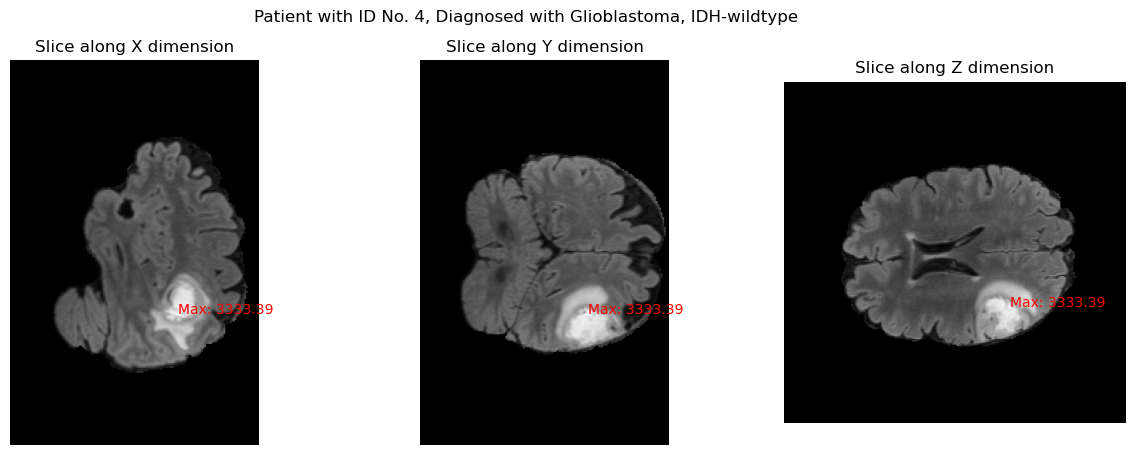

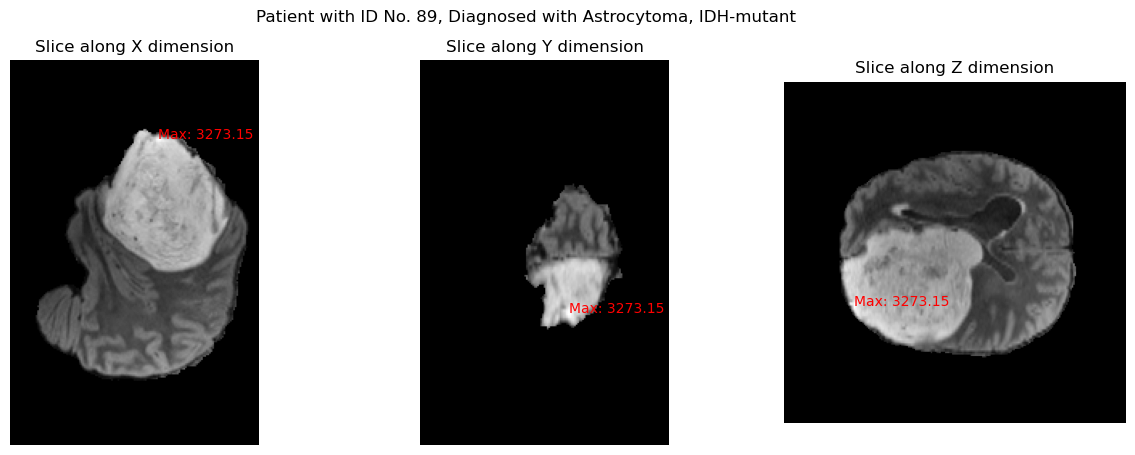

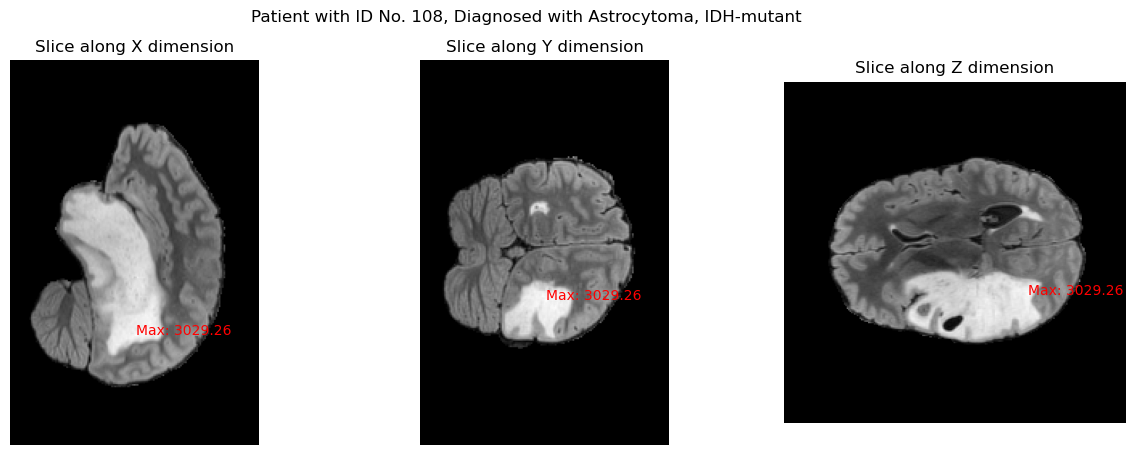

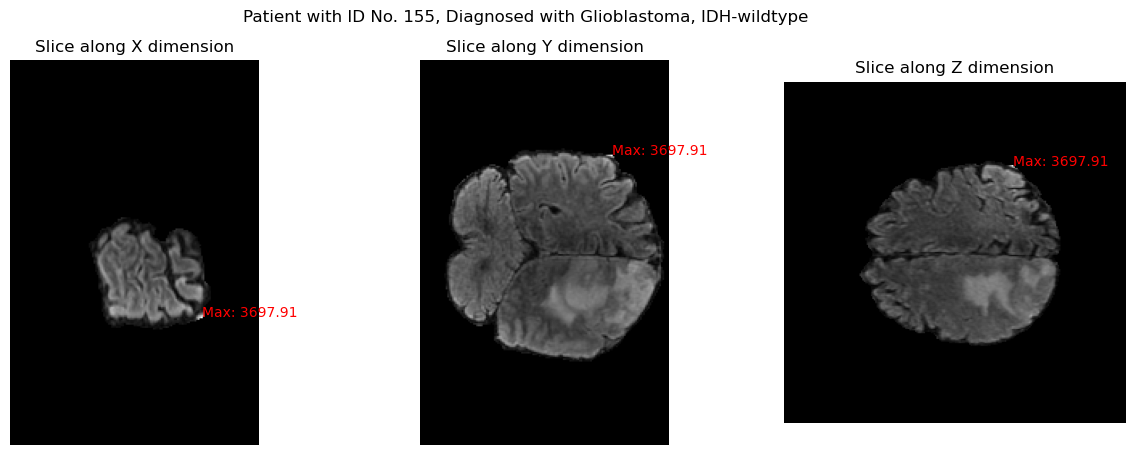

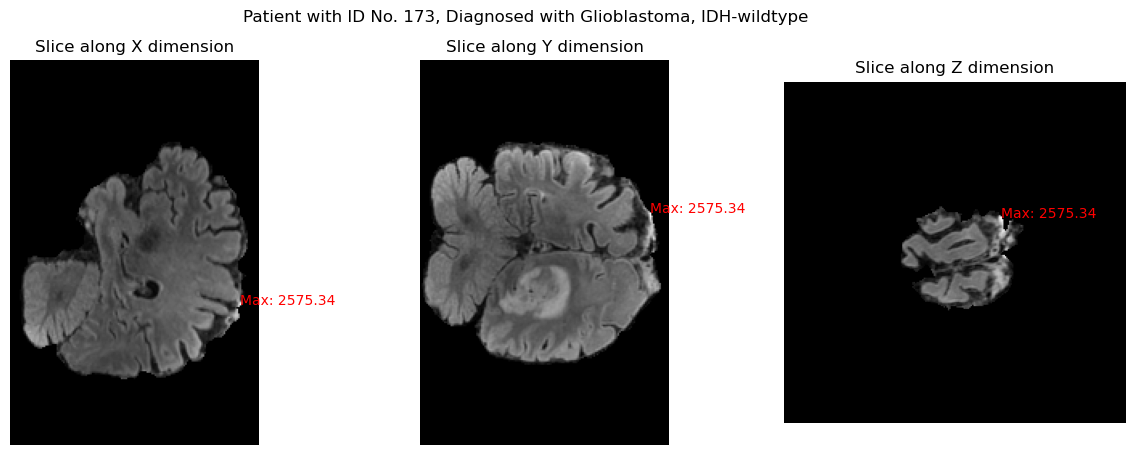

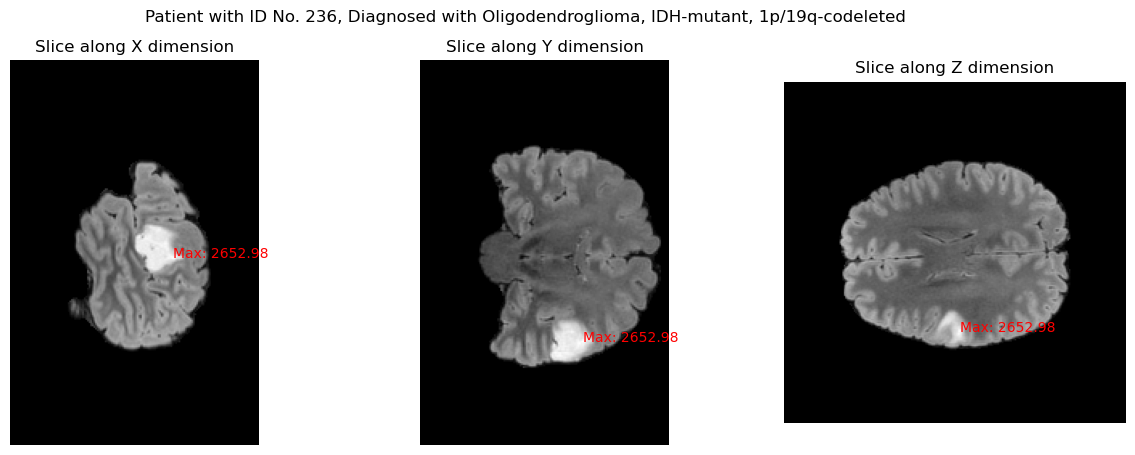

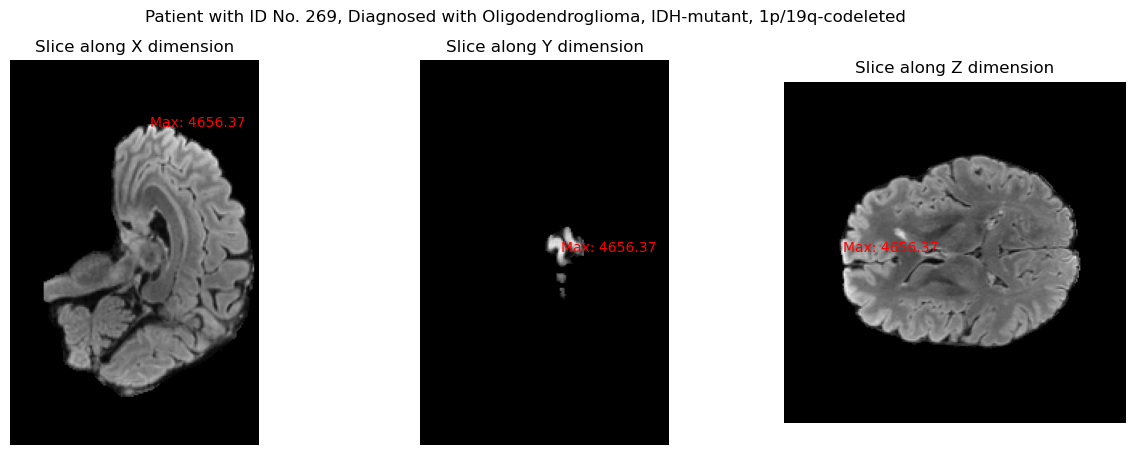

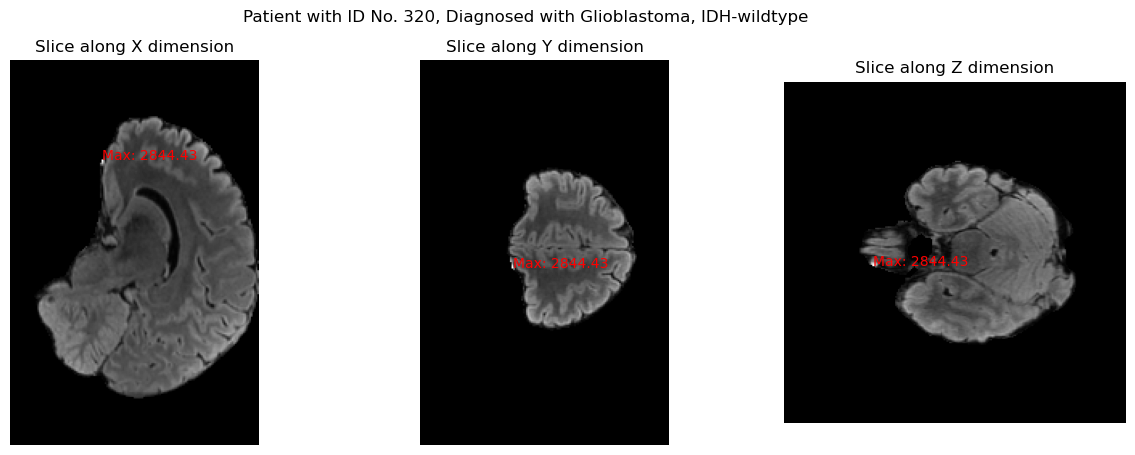

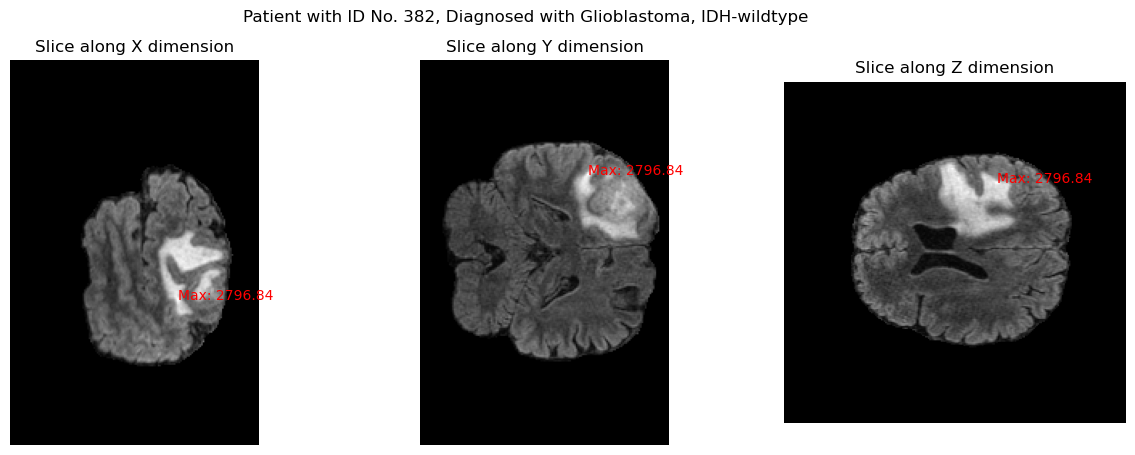

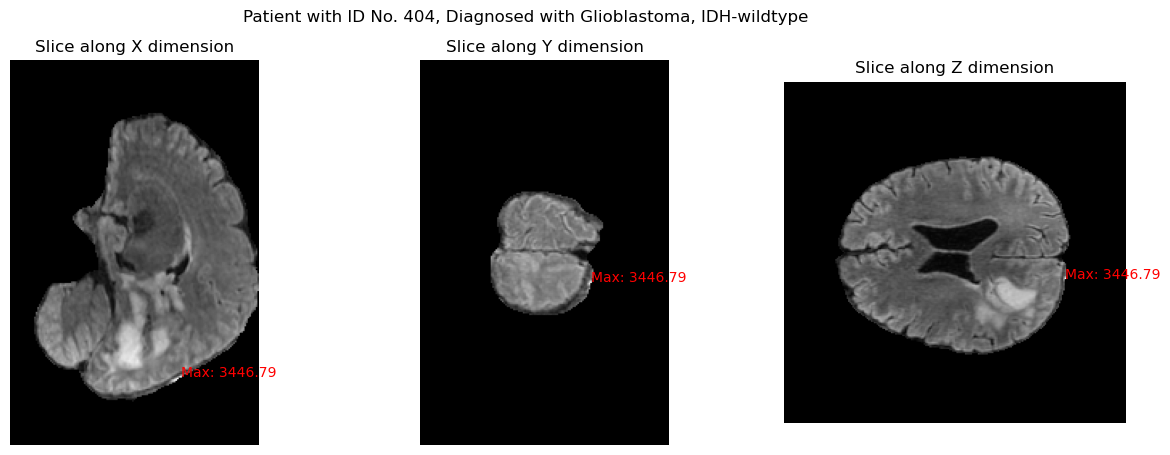

In [30]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import re
# Specify the folder path where the images are located
folder_path = 'The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'

# Load and extract the 2D slices along X, Y, and Z dimensions
for file_name in os.listdir(folder_path):
    if file_name.endswith('.nii.gz'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the image using nibabel
        image = nib.load(file_path)
        data = image.get_fdata()
        
        # Extract the numeric part from the image name and remove the first zero
        numeric_part = re.search(r'0*(\d+)', file_name).group(1)
        
        # Find the corresponding row in the data frame using the ID column
        row = df_clinical[df_clinical['ID'].str.contains(numeric_part)]
        
        diagnosis = row['Final pathologic diagnosis (WHO 2021)'].values[0]
        
        # Find the maximum value in the image - we're assuming that the maximum value belongs to the tumor
        max_value = np.max(data)
            
        # Find the indices where the maximum value occurs
        max_indices = np.where(data == max_value)
            
        # Extract the sections containing the maximum value
        slice_x = data[max_indices[0][0], :, :]
        slice_y = data[:, max_indices[1][0], :]
        slice_z = data[:, :, max_indices[2][0]]
            
        # Plot the tumor slices with the maximum value highlighted in red
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            
        axes[0].imshow(slice_x, cmap='gray')
        axes[0].set_title('Slice along X dimension')
        axes[0].axis('off')
        axes[0].text(max_indices[2][0], max_indices[1][0], f"Max: {max_value:.2f}", color='red')
            
        axes[1].imshow(slice_y, cmap='gray')
        axes[1].set_title('Slice along Y dimension')
        axes[1].axis('off')
        axes[1].text(max_indices[2][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')
            
        axes[2].imshow(slice_z, cmap='gray')
        axes[2].set_title('Slice along Z dimension')
        axes[2].axis('off')
        axes[2].text(max_indices[1][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')
            
        plt.suptitle(f"Patient with ID No. {numeric_part}, Diagnosed with {diagnosis}")
        plt.show()
    

Here MRI brain images are analyzed and highlighted the tumor region on the plotted slices. The maximum value in each image slice is assumed to correspond to the tumor region.

The code reads in MRI brain image files (.nii.gz format) using the nibabel library, extracts the image data, and identifies the maximum value within each image. It then locates the corresponding indices where the maximum value occurs in each dimension (X, Y, Z). These indices are used to extract the slices along the X, Y, and Z dimensions that contain the tumor region.

The extracted slices are then plotted using matplotlib. The tumor region within each slice is highlighted in red at the location of the maximum intensity value. The plots provide a visual representation of the tumor within the MRI brain images, aiding in the identification and visualization of potential tumor regions.



It's important to note that the assumption of the maximum value representing the tumor region might not always hold true, and further validation and expert analysis are essential. Medical professionals should interpret the plotted tumor regions and make accurate diagnoses based on comprehensive assessments and additional clinical information.



In [31]:
# Get the pixle resolution of image
data.shape

(240, 240, 155)

The dimensions (240, 240, 155) represent the shape of the MRI brain images in the dataset. Each image has a size of 240 pixels in the X and Y dimensions, and 155 slices along the Z dimension.

These dimensions indicate the resolution and depth of the MRI brain images. The X and Y dimensions determine the width and height of each image, while the Z dimension represents the number of slices or layers in the image volume, providing information in the depth or axial direction.

Understanding the dimensions of the MRI brain images is crucial for proper analysis, processing, and interpretation of the image data. It helps in ensuring compatibility with the code, applying appropriate algorithms, and maintaining consistency in the analysis pipeline.